In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #provides data structures to quickly analyze data
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

sns.set()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
data = pd.read_excel("Investment Pattern.xlsx")

In [4]:
data.head()

,Timestamp,Name:,Age Group,Gender,Profession,Do you make investments?,What kind of investments do you make?,On a scale of 1-5 where do you consider your knowledge of investments,What are your expectations from the investments you are currently making,What is your main reason for investing ? (one word/one line answer),Why do you not invest in other options?,What are your views on the recent boom in Crypto and NFTs?,Why do you not invest?
0,2022-02-17 15:47:16.472,RAJESH SHETH,41-60 years,Male,Business,Yes,"Gold, PPF, Mutual Funds, Equity Shares, FDs",3.0,Long Term returns,Security,"High Values, High Risks, higher Maintenance co...",Government Policy not clear.,NaN
1,2022-02-17 15:47:38.898,Parth nagda,16-25 years,Male,Student,Yes,"Mutual Funds, Equity Shares",4.0,Long Term returns,Yeh hi future hai,N,NaN,NaN
2,2022-02-17 15:48:33.798,NaN,16-25 years,Other,Self employed,Yes,Sex toys,5.0,Short Term returns,Create more videos,Will expend soon,Good,NaN
3,2022-02-17 15:54:04.252,Vansh Matalia,16-25 years,Male,Student,Yes,"Gold, PPF, Mutual Funds, Equity Shares, FDs, R...",4.0,"Short Term returns, Long Term returns",Returns,"Gold, mutual funds are safe investments",NaN,NaN
4,2022-02-17 15:55:21.924,Trusar Sheth,41-60 years,Male,Business,Yes,Equity Shares,3.0,Long Term returns,Financial security,Not comfortable,None,NaN


In [5]:
data_yes = data[["What is your main reason for investing ? (one word/one line answer) "]]

In [6]:
data1 = data[["What is your main reason for investing ? (one word/one line answer) "]]

In [7]:
data_yes.head()

,What is your main reason for investing ? (one word/one line answer)
0,Security
1,Yeh hi future hai
2,Create more videos
3,Returns
4,Financial security


In [8]:
data_yes.dtypes

What is your main reason for investing ? (one word/one line answer)     object
dtype: object

In [9]:
data_yes['What is your main reason for investing ? (one word/one line answer) '] = data_yes['What is your main reason for investing ? (one word/one line answer) '].astype(str)

In [10]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column

data_yes['Cleaned Opinions'] = data_yes["What is your main reason for investing ? (one word/one line answer) "].apply(clean)
data_yes.head()

,What is your main reason for investing ? (one word/one line answer),Cleaned Opinions
0,Security,Security
1,Yeh hi future hai,Yeh hi future hai
2,Create more videos,Create more videos
3,Returns,Returns
4,Financial security,Financial security


In [11]:
# POS tagger dictionary
import nltk
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data_yes['POS tagged'] = data_yes['Cleaned Opinions'].apply(token_stop_pos)
data_yes.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,What is your main reason for investing ? (one word/one line answer),Cleaned Opinions,POS tagged
0,Security,Security,"[(Security, n)]"
1,Yeh hi future hai,Yeh hi future hai,"[(Yeh, n), (hi, v), (future, a), (hai, n)]"
2,Create more videos,Create more videos,"[(Create, n), (videos, n)]"
3,Returns,Returns,"[(Returns, n)]"
4,Financial security,Financial security,"[(Financial, a), (security, n)]"


In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
          lemma = word
          lemma_rew = lemma_rew + " " + lemma
      else:
          lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
          lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data_yes['Lemma'] = data_yes['POS tagged'].apply(lemmatize)
data_yes.head()

,What is your main reason for investing ? (one word/one line answer),Cleaned Opinions,POS tagged,Lemma
0,Security,Security,"[(Security, n)]",Security
1,Yeh hi future hai,Yeh hi future hai,"[(Yeh, n), (hi, v), (future, a), (hai, n)]",Yeh hi future hai
2,Create more videos,Create more videos,"[(Create, n), (videos, n)]",Create video
3,Returns,Returns,"[(Returns, n)]",Returns
4,Financial security,Financial security,"[(Financial, a), (security, n)]",Financial security


In [13]:
data_yes1 = data_yes [["What is your main reason for investing ? (one word/one line answer) ", "POS tagged","Lemma"]]
data_yes = data_yes[["What is your main reason for investing ? (one word/one line answer) ", "Lemma"]]

In [14]:
data_yes.head(20)

,What is your main reason for investing ? (one word/one line answer),Lemma
0,Security,Security
1,Yeh hi future hai,Yeh hi future hai
2,Create more videos,Create video
3,Returns,Returns
4,Financial security,Financial security
5,Security,Security
6,nan,nan
7,Creating wealth in the long term,Creating wealth long term
8,EARNING MORE THAN NORMAL FD RETURNS.,EARNING NORMAL FD RETURNS
9,Cover up my Student Loans,Cover Student Loans


In [15]:
data_yes.isnull().sum()

What is your main reason for investing ? (one word/one line answer)     0
Lemma                                                                   0
dtype: int64

In [16]:
data_yes = data_yes.dropna(how='all')

In [17]:
data_yes.head(20)

,What is your main reason for investing ? (one word/one line answer),Lemma
0,Security,Security
1,Yeh hi future hai,Yeh hi future hai
2,Create more videos,Create video
3,Returns,Returns
4,Financial security,Financial security
5,Security,Security
6,nan,nan
7,Creating wealth in the long term,Creating wealth long term
8,EARNING MORE THAN NORMAL FD RETURNS.,EARNING NORMAL FD RETURNS
9,Cover up my Student Loans,Cover Student Loans


In [18]:
data_yes = data_yes[data_yes['Lemma'].str.contains('nan')==False]

In [19]:
data_yes.head(20)

,What is your main reason for investing ? (one word/one line answer),Lemma
0,Security,Security
1,Yeh hi future hai,Yeh hi future hai
2,Create more videos,Create video
3,Returns,Returns
5,Security,Security
7,Creating wealth in the long term,Creating wealth long term
8,EARNING MORE THAN NORMAL FD RETURNS.,EARNING NORMAL FD RETURNS
9,Cover up my Student Loans,Cover Student Loans
10,Long term wealth,Long term wealth
11,Good returns,Good return


In [20]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
  return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [21]:
fin_data = pd.DataFrame(data_yes[['What is your main reason for investing ? (one word/one line answer) ', 'Lemma']])
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,What is your main reason for investing ? (one word/one line answer),Lemma,Polarity,Analysis
0,Security,Security,0.0,Neutral
1,Yeh hi future hai,Yeh hi future hai,0.0,Neutral
2,Create more videos,Create video,0.0,Neutral
3,Returns,Returns,0.0,Neutral
5,Security,Security,0.0,Neutral


In [22]:
fin_data.head(20)

,What is your main reason for investing ? (one word/one line answer),Lemma,Polarity,Analysis
0,Security,Security,0.00,Neutral
1,Yeh hi future hai,Yeh hi future hai,0.00,Neutral
2,Create more videos,Create video,0.00,Neutral
3,Returns,Returns,0.00,Neutral
5,Security,Security,0.00,Neutral
7,Creating wealth in the long term,Creating wealth long term,-0.05,Negative
8,EARNING MORE THAN NORMAL FD RETURNS.,EARNING NORMAL FD RETURNS,0.15,Positive
9,Cover up my Student Loans,Cover Student Loans,0.00,Neutral
10,Long term wealth,Long term wealth,-0.05,Negative
11,Good returns,Good return,0.70,Positive


In [23]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts


Neutral     113
Positive     25
Negative     10
Name: Analysis, dtype: int64

In [28]:
pip install vaderSentiment

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
    
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,What is your main reason for investing ? (one word/one line answer),Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Security,Security,0.0,Neutral,0.3400,Neutral
1,Yeh hi future hai,Yeh hi future hai,0.0,Neutral,0.0000,Neutral
2,Create more videos,Create video,0.0,Neutral,0.2732,Neutral
3,Returns,Returns,0.0,Neutral,0.0000,Neutral
5,Security,Security,0.0,Neutral,0.3400,Neutral


In [30]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     121
Positive     27
Name: Vader Analysis, dtype: int64

In [31]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += swn_synset.pos_score() - swn_synset.neg_score()
            tokens_count += 1
            # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"

fin_data['SWN analysis'] = data_yes1['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,What is your main reason for investing ? (one word/one line answer),Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Security,Security,0.0,Neutral,0.3400,Neutral,0.0
1,Yeh hi future hai,Yeh hi future hai,0.0,Neutral,0.0000,Neutral,0.0
2,Create more videos,Create video,0.0,Neutral,0.2732,Neutral,0.0
3,Returns,Returns,0.0,Neutral,0.0000,Neutral,0.0
5,Security,Security,0.0,Neutral,0.3400,Neutral,0.0


In [32]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

0.0    145
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4534870390>,
 [Text(-0.924229583030455, 0.5964894616431639, 'Neutral'),
  Text(1.1342817952619, -0.7320551952806845, 'Positive')],
 [Text(-0.5041252271075208, 0.32535788816899847, '81.8%'),
  Text(0.7141774266463815, -0.46092364147302356, '18.2%')])

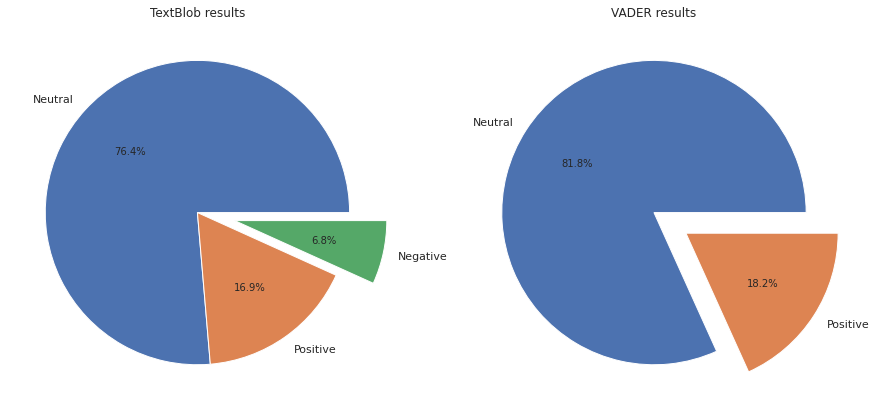

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0.25), autopct='%1.1f%%', shadow=False)

In [34]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [37]:
pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=7466f260e7869827dffaef570f18dcd8b2c549db5830bb0ae2d9e0fe2d551915
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


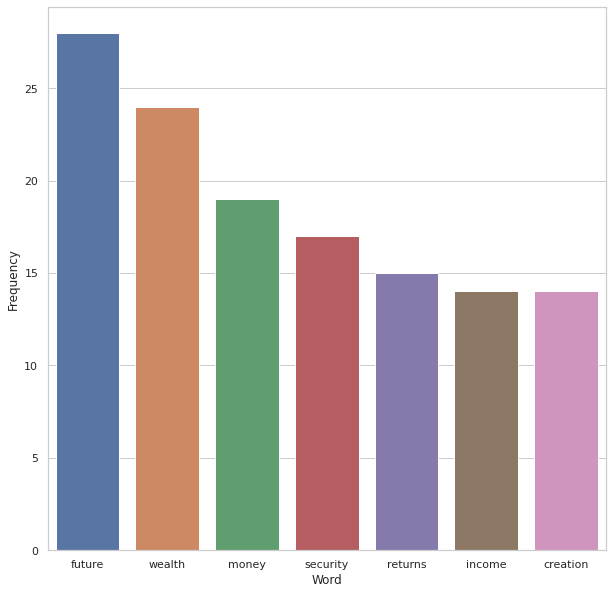

In [38]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)
a = data1["What is your main reason for investing ? (one word/one line answer) "].str.lower().str.cat(sep=' ')
# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
  if w not in stop_words:
    filtered_sentence.append(w)
    # Remove characters which have length less than 2  

without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [ ]:
def wc(data,bgcolor,title):
  plt.figure(figsize = (100,100))
  wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
  wc.generate(' '.join(data))
  plt.imshow(wc)
  plt.axis('off')

wc(cleaned_data_title,'black','Common Words' )

In [47]:
data_no= data[["Why do you not invest?"]]

In [48]:
data_no=data_no.dropna()

In [49]:
data_no["Why do you not invest?"] = data_no["Why do you not invest?"].astype(str)
data_no['Cleaned Opinions'] = data_no["Why do you not invest?"].apply(clean)
data_no.head()

,Why do you not invest?,Cleaned Opinions
6,Husband takes care of investments,Husband takes care of investments
13,Will do it in the near future but not now,Will do it in the near future but not now
20,Because I’m a student?,Because I m a student
26,Don't have the time to put in. Don't want to i...,Don t have the time to put in Don t want to in...
35,Lack in confidence due to not enough knowledge...,Lack in confidence due to not enough knowledge...


In [50]:
data_no['POS tagged'] = data_no['Cleaned Opinions'].apply(token_stop_pos)
data_no.head()

,Why do you not invest?,Cleaned Opinions,POS tagged
6,Husband takes care of investments,Husband takes care of investments,"[(Husband, n), (takes, v), (care, n), (investm..."
13,Will do it in the near future but not now,Will do it in the near future but not now,"[(near, a), (future, n)]"
20,Because I’m a student?,Because I m a student,"[(student, n)]"
26,Don't have the time to put in. Don't want to i...,Don t have the time to put in Don t want to in...,"[(time, n), (put, v), (want, v), (invest, v), ..."
35,Lack in confidence due to not enough knowledge...,Lack in confidence due to not enough knowledge...,"[(Lack, n), (confidence, n), (due, a), (enough..."


In [51]:
data_no['Lemma'] = data_no['POS tagged'].apply(lemmatize)
data_no.head()

,Why do you not invest?,Cleaned Opinions,POS tagged,Lemma
6,Husband takes care of investments,Husband takes care of investments,"[(Husband, n), (takes, v), (care, n), (investm...",Husband take care investment
13,Will do it in the near future but not now,Will do it in the near future but not now,"[(near, a), (future, n)]",near future
20,Because I’m a student?,Because I m a student,"[(student, n)]",student
26,Don't have the time to put in. Don't want to i...,Don t have the time to put in Don t want to in...,"[(time, n), (put, v), (want, v), (invest, v), ...",time put want invest without properly study
35,Lack in confidence due to not enough knowledge...,Lack in confidence due to not enough knowledge...,"[(Lack, n), (confidence, n), (due, a), (enough...",Lack confidence due enough knowledge make go...


In [54]:
fin_data_no = pd.DataFrame(data_no[['Why do you not invest?']])
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data_no['Polarity'] = fin_data_no['Why do you not invest?'].apply(getPolarity) 
fin_data_no['Analysis'] = fin_data_no['Polarity'].apply(analysis)
fin_data_no.head()

,Why do you not invest?,Polarity,Analysis
6,Husband takes care of investments,0.000000,Neutral
13,Will do it in the near future but not now,0.050000,Positive
20,Because I’m a student?,0.000000,Neutral
26,Don't have the time to put in. Don't want to i...,0.000000,Neutral
35,Lack in confidence due to not enough knowledge...,0.191667,Positive


In [55]:
tb_counts = fin_data_no.Analysis.value_counts()
tb_counts

Neutral     26
Positive     9
Negative     3
Name: Analysis, dtype: int64

In [56]:
data_crypto=data[["What are your views on the recent boom in Crypto and NFTs?"]]

In [57]:
data_crypto=data_crypto.dropna()

In [58]:
data_crypto.head()

,What are your views on the recent boom in Crypto and NFTs?
0,Government Policy not clear.
2,Good
4,None
5,No idea
7,I find it nonsense. There's no regulatory body...


In [61]:
fin_data_c = pd.DataFrame(data_crypto[['What are your views on the recent boom in Crypto and NFTs?']])
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data_c['Polarity'] = fin_data_c['What are your views on the recent boom in Crypto and NFTs?'].apply(getPolarity) 
fin_data_c['Analysis'] = fin_data_c['Polarity'].apply(analysis)
fin_data_c.head()

,What are your views on the recent boom in Crypto and NFTs?,Polarity,Analysis
0,Government Policy not clear.,-0.05,Negative
2,Good,0.70,Positive
4,None,0.00,Neutral
5,No idea,0.00,Neutral
7,I find it nonsense. There's no regulatory body...,0.00,Neutral


In [63]:
tb_counts = fin_data_c.Analysis.value_counts()
tb_counts

Neutral     78
Positive    35
Negative    20
Name: Analysis, dtype: int64